In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
import catboost as cat_
import seaborn as sns
import lightgbm as lgb
from scipy import stats

In [2]:
# Importing datasets
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")
#train_dummy = pd.get_dummies(train_data.drop(['uniqueid'], axis=1))
#test_dummy = pd.get_dummies(test_data.drop(['uniqueid'], axis=1))

In [3]:
# Merging the train and test data
ntrain = train_data.shape[0] 
ntest = test_data.shape[0]
dataset = pd.concat((train_data, test_data), sort=False).reset_index(drop=True)
dataset['year'].unique()
dataset.year.unique()

array([2018, 2016, 2017], dtype=int64)

# VISUALIZATION

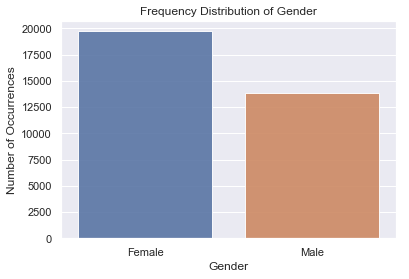

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
gender_count = dataset['gender_of_respondent'].value_counts()
sns.set(style="darkgrid")
sns.barplot(gender_count.index, gender_count.values, alpha=0.9)
plt.title('Frequency Distribution of Gender')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

In [5]:
y_train = train_data.bank_account.values
y_train.shape

(23524,)

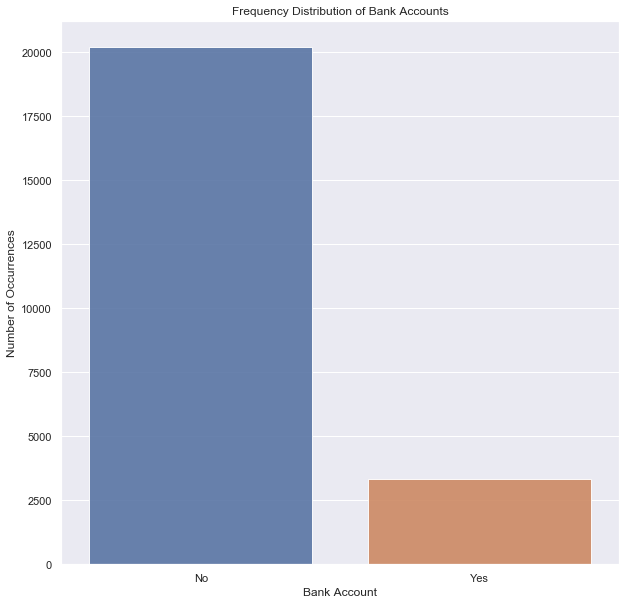

In [6]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
bank_account_count = train_data['bank_account'].value_counts()
sns.set(style="darkgrid")
sns.barplot(bank_account_count.index, bank_account_count.values, alpha=0.9)
plt.title('Frequency Distribution of Bank Accounts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Bank Account', fontsize=12)
plt.show()

In [7]:
train_data['bank_account'].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

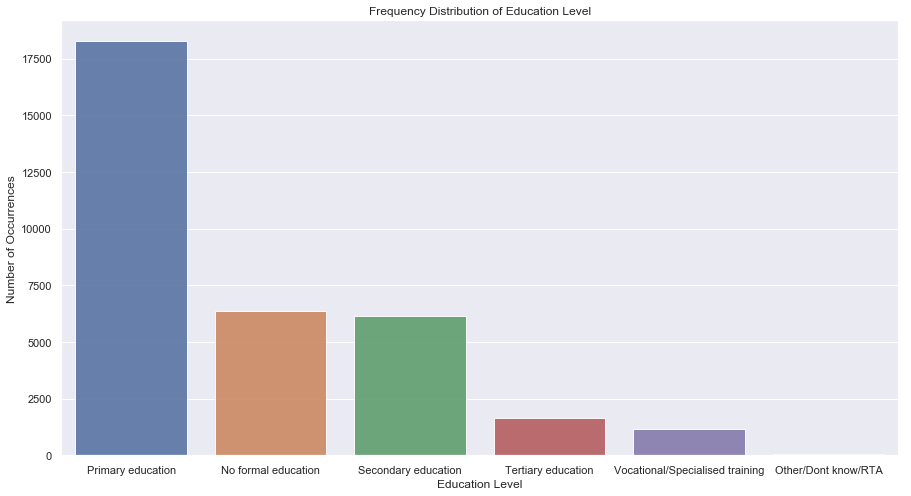

In [8]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
education_level_count = dataset['education_level'].value_counts()
sns.set(style="darkgrid")
sns.barplot(education_level_count.index, education_level_count.values, alpha=0.9)
plt.title('Frequency Distribution of Education Level')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Education Level', fontsize=12)
plt.show()

In [9]:
dataset['education_level'].value_counts()

Primary education                  18270
No formal education                 6351
Secondary education                 6125
Tertiary education                  1649
Vocational/Specialised training     1162
Other/Dont know/RTA                   53
Name: education_level, dtype: int64

# futher Analysis can be done in excel pivot table. comparing education levels to bank account created

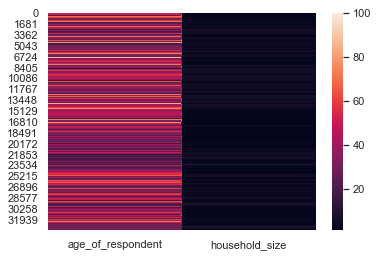

In [10]:
sns.heatmap(dataset[['age_of_respondent','household_size']])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


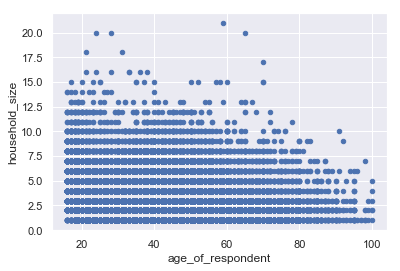

In [11]:
dataset[['age_of_respondent','household_size']].plot.scatter(x = 'age_of_respondent',y = 'household_size')

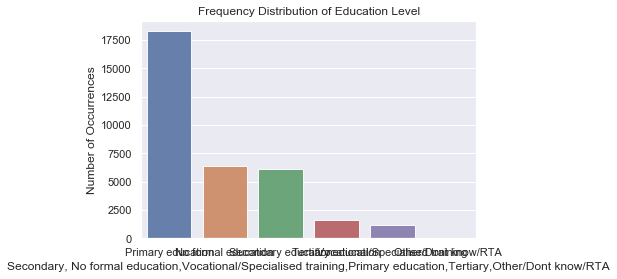

In [12]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
education_level_count = dataset['education_level'].value_counts()
sns.set(style="darkgrid")
sns.barplot(education_level_count.index, education_level_count.values, alpha=0.9)
plt.title('Frequency Distribution of Education Level')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Secondary, No formal education,Vocational/Specialised training,Primary education,Tertiary,Other/Dont know/RTA', fontsize=12)
plt.show()

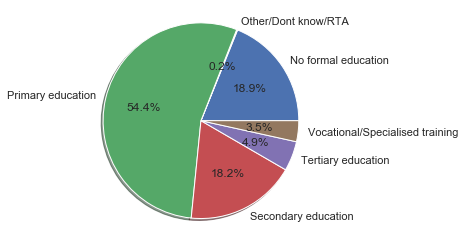

In [13]:
#Pie Chart
labels = dataset['education_level'].astype('category').cat.categories.tolist()
counts = dataset['education_level'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [14]:
dataset.head()
#dataset = dataset.drop(['bank_account'], axis=1)
dataset.education_level.unique()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33610 entries, 0 to 33609
Data columns (total 13 columns):
country                   33610 non-null object
year                      33610 non-null int64
uniqueid                  33610 non-null object
bank_account              23524 non-null object
location_type             33610 non-null object
cellphone_access          33610 non-null object
household_size            33610 non-null int64
age_of_respondent         33610 non-null int64
gender_of_respondent      33610 non-null object
relationship_with_head    33610 non-null object
marital_status            33610 non-null object
education_level           33610 non-null object
job_type                  33610 non-null object
dtypes: int64(3), object(10)
memory usage: 3.3+ MB


In [15]:
dataset.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


## Replacing some binary response with 1 or 0
##### There will be another model that will use encoder instead of replacing method

In [16]:
#train_data['bank_account'] = train_data['bank_account'].str.replace('Yes','1')
#train_data['bank_account'] = train_data['bank_account'].str.replace('No','0')
y_train = train_data.bank_account.values

In [17]:
y_train.shape

(23524,)

In [18]:
#dataset['cellphone_access'] = dataset['cellphone_access'].str.replace('Yes','1')
#dataset['cellphone_access'] = dataset['cellphone_access'].str.replace('No','0')
#dataset['gender_of_respondent'] = dataset['gender_of_respondent'].str.replace('Male','1')
#dataset['gender_of_respondent'] = dataset['gender_of_respondent'].str.replace('Female','0')
#dataset['year'] = dataset['year'].replace(2018,1)
#dataset['year'] = dataset['year'].replace(2017,2)
#dataset['year'] = dataset['year'].replace(2016,3)


#dataset.head()

In [21]:
dataset = dataset.drop(['uniqueid'], axis=1)
dataset = dataset.drop(['bank_account'], axis=1)

In [22]:
data = pd.get_dummies(dataset)
data_1 = data #For checking distributions

In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LE = LabelEncoder()

In [ ]:
data_1.head()

In [ ]:
#dataset = LE.fit_transform(dataset)

In [ ]:
data.shape

In [ ]:
data.head()

In [ ]:
data.describe()

# SCALLING OF SOME COLUMNS
### Before scaling, the type of distribution must be checked first. This will help you know the scale that must be used

In [ ]:
data_mean = np.mean(data_1[['household_size', 'age_of_respondent']])
data_median_hhsiz = np.median(data_1['household_size'])
data_median_age = np.median(data_1['age_of_respondent'])
data_mode = stats.mode(data_1[['household_size', 'age_of_respondent']])
print("The means for the various columns are: {} ".format(data_mean))
print("The median for the household_size is : {}".format(data_median_hhsiz))
print("The median for the Age_of_respondant is : {}".format(data_median_age))
print("The modes for the various columns are: {}".format(data_mode))

## Method 1.
### Min - Maximum Scale.
##### formular => Xnew = ((X-Xmin)/(Xmax - Xmin))
This scale is sensitive to outliers and its been used when the data is not Gaussian(Normal distribution)
To check normalisation, mean must be between mode & Median.
From the distribution of the two columns, the mean is greater than the mode and median. this indcates that the data is not Gaussian. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
df = MinMaxScaler()
data[['year','household_size','age_of_respondent']] = df.fit_transform(data[['year','household_size','age_of_respondent']])

In [ ]:
data.year.unique()

# 2. Standard Scaler:
### It assumes the data is normal distribution and its centered around 0, with a standard deviation of 1
z = (x - u) / s
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## 3. Max Abs Scaler
#### Scale each feature by its maximum absolute value. This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set is 1.0. It does not shift/center the data and thus does not destroy any sparsity.
On positive-only data, this Scaler behaves similarly to Min Max Scaler and, therefore, also suffers from the presence of significant outliers.
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

## 4) Robust Scaler
#### As the name suggests, this Scaler is robust to outliers. If our data contains many outliers, scaling using the mean and standard deviation of the data won’t work well.
This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile). The centering and scaling statistics of this Scaler are based on percentiles and are therefore not influenced by a few numbers of huge marginal outliers. Note that the outliers themselves are still present in the transformed data. If a separate outlier clipping is desirable, a non-linear transformation is required.
##### from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

## 5) Quantile Transformer Scaler
Transform features using quantiles information.
This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is, therefore, a robust pre-processing scheme.
The cumulative distribution function of a feature is used to project the original values. Note that this transform is non-linear and may distort linear correlations between variables measured at the same scale but renders variables measured at different scales more directly comparable. This is also sometimes called as Rank scaler.
#### from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()

## 6) Power Transformer Scaler
The power transformer is a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to the variability of a variable that is unequal across the range (heteroscedasticity) or situations where normality is desired.
The power transform finds the optimal scaling factor in stabilizing variance and minimizing skewness through maximum likelihood estimation. Currently, Sklearn implementation of PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood. Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data.
#### from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [ ]:
#Train and test datasets
train = data[:ntrain].copy()
test = data[ntrain:].copy()
test = test.reset_index(drop=True)

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
data.shape

In [ ]:
data.head()

In [ ]:
#pip install rpy2

In [ ]:
train.head()

In [ ]:
# lightgbm for classifier
from numpy import mean
from numpy import std
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# evaluate the model
model = LGBMClassifier()
# fit the model on the whole dataset
model_lg = LGBMClassifier()
model_lg.fit(train, y_train)
y_pred_lgb = model_lg.predict_proba(test)

In [ ]:
y_pred_lgb

In [ ]:
# catboost for regression
from catboost import CatBoostClassifier
from matplotlib import pyplot
# evaluate the model
model = CatBoostClassifier(verbose=0, n_estimators=100)
# fit the model on the whole dataset
model_cat = CatBoostClassifier(verbose=0, n_estimators=100)
model_cat.fit(train, y_train)
y_pred_cat1 = model_cat.predict_log_proba(test)
y_pred_cat = model_cat.predict_proba(test)

In [ ]:
y_pred_cat

In [ ]:
# xgboost for regression
from xgboost import XGBClassifier
# fit the model on the whole dataset
model_xg = XGBClassifier(objective='binary:logistic', use_label_encoder=True)
model_xg.fit(train, y_train)
y_pred_xg = model_xg.predict_proba(test)

In [ ]:
y_pred_xg

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
#from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingClassifier

In [ ]:
#conda install mlxtend

In [ ]:
# make a prediction with a stacking mlxtend
from sklearn.linear_model import LinearRegression
import mlxtend
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression

# define meta learner model
lr = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(classifiers=[model_lg, model_cat, model_xg], meta_classifier=lr)
# fit the model on all available data
model.fit(train, y_train)
stack_result = model.predict_proba(test)


In [ ]:
stack_result.shape

In [ ]:
#Submission1 = pd.DataFrame(stack_result, columns=['bank_account']).to_csv('Submission1.csv')

In [ ]:
#Submission['bank_account'] = stack_result #model_lg.predict(test) 
#file_name = 'submission-stack-raw.csv'
#Submission.to_csv(file_name ,index=False)